In [4]:
cd ..

/Users/miguel/Jottacloud/HedgingRL


In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
import numpy as np
import pandas as pd
pd.set_option('display.width', 320)
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:,.2f}'.format
from scipy.stats import norm
import matplotlib.pyplot as plt
from blackscholes.mathfin import *

In [51]:
%whos

Variable                    Type                Data/Info
---------------------------------------------------------
CallOption                  type                <class 'blackscholes.mathfin.CallOption'>
K                           float               100.0
Ndays                       int                 4
S                           ndarray             1000: 1000 elems, type `float64`, 8000 bytes
S0                          int                 1
Strike                      float               100.0
blackScholes                function            <function blackScholes at 0x11a5b3510>
blackscholes                module              <module 'blackscholes' fr<...>lackscholes/__init__.py'>
call                        type                <class 'blackscholes.mathfin.CallOption'>
cash                        int                 0
dayToSellCall               int                 1
dt                          float               0.004
fixed                       MetaHasTraits       <class 'ip

In [8]:
S = 90.
K = 100.
vol = .3
dt = 1/ 250.
cash = 0
dayToSellCall = 1
Ndays = 4
maturityCall = Ndays - 1

call = CallOption(dayToSellCall, maturityCall, K, )

In [19]:
r = np.random.randn((1000))
S0 = 1
S = S0 * np.cumsum(r)

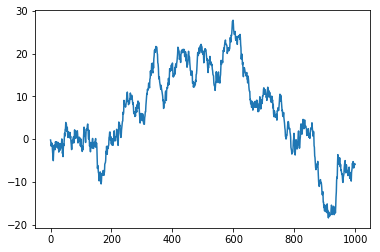

In [20]:
%matplotlib inline
plt.plot(S)

In [40]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [52]:
@interact(mu=(-0.02, 0.05, 0.01), sigma=(0.01, 0.1, 0.005), S0=(1,100,10), dt=(0.001, 0.1, 0.001))
def plot_gbm(mu, sigma, S0, dt):
    s, t = geometric_brownian_motion(mu=mu, sigma=sigma, t=2, dt=dt, s0=S0)
    pd.Series(t, s).plot()
    plt.show()

In [53]:
tau = np.clip( np.linspace(1.0, .0, 101), 0.0000001, 100)
S = 1.
K = 1.
sigma = 1
df = pd.DataFrame.from_dict(blackScholes(tau, S, K, sigma))
df.index = tau

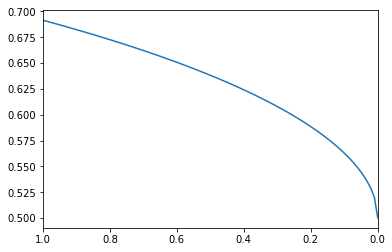

In [55]:
df.delta.plot()

In [64]:
@interact(mu=(-0.02, 0.05, 0.01), sigma=(0.01, 0.1, 0.005), S0=(1,100,10), dt=(0.001, 0.1, 0.001))
def plot_gbm(mu, sigma, S0, dt):
    T = 2.
    t, s = geometric_brownian_motion(mu=mu, sigma=sigma, t=T, dt=dt, s0=S0)
#     df = pd.DataFrame.from_dict(blackscholes())
    print(s)
    pd.Series(s, (T - t ) / T).plot()
    plt.show()

In [1]:
S = 90.0
Strike = 100.0
vol = .30
dt = 1/250.
cash = 0
dayToSellCall = 1
maturityCall = Ndays-1
Ndays = 
call = CallOption(dayToSellCall,maturityCall,Strike,-10)# sell one call on dayToSellCall day

columns = ('spot','vol','shares','cash','option','npv','vega','gamma','theta','pnlPredict')
df = pd.DataFrame([[S,vol,0,0,0,0,0,0,0,0]], columns=columns)


def deltahedge(Ndays, option=None, Sdynamics="S*=(1.0+vol*np.sqrt(dt)*np.random.randn())", volDynamics="vol=.30"):
    for day in range(1,Ndays+1):
        exec(Sdynamics)
        print(S)
        exec(volDynamics)

        if day==dayToSellCall: #sell call
          callValue=call.calc(day,vol,S)
          cash-=callValue['npv']

        #delta hedge
        callValue=call.calc(day,vol,S)
        delta=callValue['delta']
        currentNumberShares=df.iloc[day-1].shares
        sharesBuy=-currentNumberShares-delta
        cash-=sharesBuy*S
        if day==maturityCall:
            cash+=call.calc(day,vol,S)['intrinsic'] #settle call

        gamma=callValue['gamma']
        theta=callValue['theta']
        dS=S-df.iloc[day-1].spot
        pnlPredict=0.5*gamma*dS*dS+theta*dt
        dfnew=pd.DataFrame([[S,vol,-delta,cash,-callValue['npv'],cash+callValue['npv']-delta*S,callValue['vega'],gamma,theta/250.,pnlPredict]],columns=columns)
        df=df.append(dfnew,ignore_index=True)

    df['pnl'] = df['npv'] - df['npv'].shift(1)
    df['vol']=100.0*df['vol']
    df['error']=df['pnl']-df['pnlPredict']
    df.set_value(dayToSellCall, "error", 0)
    #df.loc[:,['vol','spot']].plot(title='Spot and implied Volatility')
    df.loc[:,['npv','spot','option']].plot(title='-Call+delta*S+cash vs Spot {0} {1}'.format(Sdynamics,volDynamics))
    df.loc[:,['theta']].plot(title='Theta {0} {1}'.format(Sdynamics,volDynamics))
    df.loc[:,['pnl']].hist(bins=50)
    return df
    #df.loc[:,['error']].hist(bins=50)
    #print df.loc[:,['pnl']].describe()

NameError: name 'Ndays' is not defined

In [39]:
df

,spot,vol,shares,cash,option,npv,vega,gamma,theta,pnlPredict,pnl,error
0,90.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan
1,90.00,30.00,5.49,-317.22,177.16,0.00,-711.89,-0.07,0.11,0.11,0.00,0.00
2,90.00,30.00,5.49,-317.14,177.05,0.11,-711.55,-0.07,0.11,0.11,0.11,-0.00
3,90.00,30.00,5.49,-317.05,176.94,0.21,-711.22,-0.07,0.11,0.11,0.11,-0.00
4,90.00,30.00,5.49,-316.97,176.84,0.32,-710.88,-0.07,0.11,0.11,0.11,-0.00
5,90.00,30.00,5.49,-316.88,176.73,0.43,-710.55,-0.07,0.11,0.11,0.11,-0.00
6,90.00,30.00,5.49,-316.80,176.62,0.54,-710.21,-0.07,0.11,0.11,0.11,-0.00
7,90.00,30.00,5.49,-316.71,176.51,0.64,-709.87,-0.07,0.11,0.11,0.11,-0.00
8,90.00,30.00,5.49,-316.63,176.41,0.75,-709.54,-0.07,0.11,0.11,0.11,-0.00
9,90.00,30.00,5.49,-316.54,176.30,0.86,-709.20,-0.07,0.11,0.11,0.11,-0.00


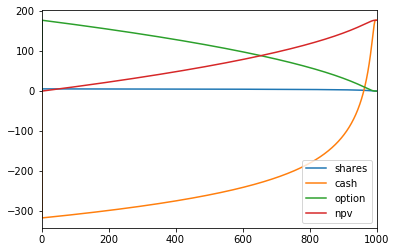

In [47]:
%matplotlib inline
df[['shares', 'cash', 'option', 'npv']].plot()

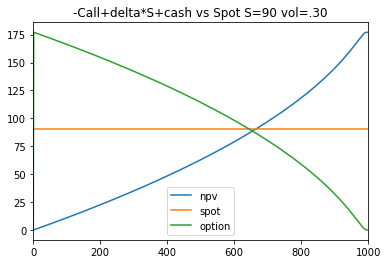

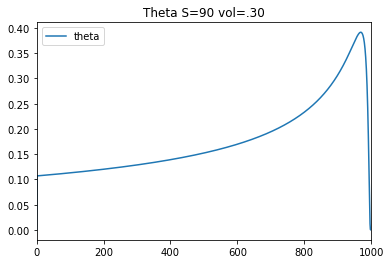

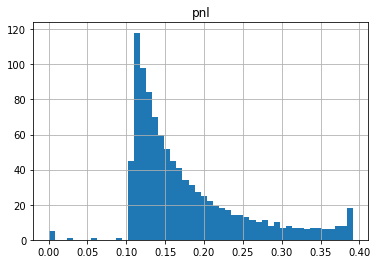

In [44]:
#df = deltahedge(1000)#constant vol
# df = deltahedge(1000, volDynamics="vol*=(1.0+0.5*np.sqrt(dt)*np.random.randn())")#stochastic vol
df = deltahedge(1000, Sdynamics="S=90") #consant OTM
# deltahedge(10000, Sdynamics="S=100") #consant ATM
# deltahedge(10000, Sdynamics="S=110")#consant ITM
# deltahedge(10000, Sdynamics="S+=S*dt") #growing stock
plt.show()
